In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
from copy import deepcopy
import random
from kmeans import K_Means

We'll read in the data now. The iris dataset is very complete but it might be beneficial to do some feature engineering on it and eliminate features that are not necessary.

In [7]:
df_iris = pd.read_csv('../data/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
xAxis      = df_iris['PetalLengthCm']
xAxisLabel = 'Petal Length (cm)'
yAxis      = df_iris['PetalWidthCm']
yAxisLabel = 'Petal Width (cm)'
classVerify = df_iris['Species']

In [9]:
#Feature enginering
if xAxis.min() == xAxis.max() or yAxis.min() == yAxis.max():
    raise Exeption('Cannot run K-Means without at-least 2 distinct data points')
xAxis -= xAxis.min()
xAxis /= xAxis.max()
xAxis = 4*xAxis - 2

yAxis -= yAxis.min()
yAxis /= yAxis.max()
yAxis = 4*yAxis - 2

Not much to change with the dataset, we'll call the K-Means class.

K is 3


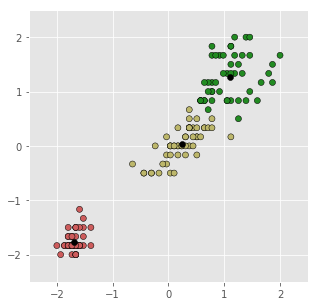

In [10]:

colmap = [name for name, hex in matplotlib.colors.cnames.items()]
random.Random(0).shuffle(colmap)
k = len(set(classVerify))
print("K is %s" % k)
kmeans = K_Means(xAxis, yAxis, classVerify)

classificationColors = []
for i in range(len(xAxis)):
    index = kmeans.predict(xAxis[i],yAxis[i])
    color = colmap[index]
    classificationColors.append(color)

fig = plt.figure(figsize=(5, 5))

plt.scatter(xAxis, yAxis, color=classificationColors, edgecolor='k')
plt.scatter([kmeans.centroids[i][0] for i in range(k)], [kmeans.centroids[i][1] for i in range(k)], color='k')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

There are some good clusters here. It would definitely be useful to see what combination of features give the best clusters.